# Exercise 4.10 IC Final Report Part-1

#This script contains the following points:

#1 Import Libraries and Data

#2 Address any PII data

#3 Regional Segementation of Data

#4 Exclude low-activity customers

#5 Customer profiles

#6 Dataframe exported for viualizations in part-2.

# 1 Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path
path=r'C:\Users\User01\16.05.2023 Instacart Basket Analysis'
viz_path = r'C:\Users\User01\16.05.2023 Instacart Basket Analysis\04 Analysis\Visualizations'

In [3]:
#import customer_merged file
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged_updated.pkl'))

In [4]:
#check data after importing
df.shape

(31761277, 34)

In [5]:
df.dtypes

order_id                    object
user_id                     object
order_number                  int8
orders_day_of_week            int8
order_hour_of_day             int8
days_since_prior_order     float16
product_id                   int32
add_to_cart_order            int64
reordered                     int8
Unnamed: 0                   int64
product_name                object
aisle_id                      int8
department_id                 int8
prices                     float32
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                     int8
loyalty_flag                object
mean_price                 float16
spender_flag                object
median_days                float16
frequency_flag              object
first_name                  object
last_name                   object
gender                      object
state               

In [6]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 2 Address any PII data

In [7]:
# Droping PII columns 'first_name' & 'last_name'
df.drop(['first_name', 'last_name'], axis=1, inplace=True)

In [8]:
#check output
df.shape

(31761277, 32)

# Removed PII columns 'first_name' and 'last_name' from dataset as they are not relevant for the purpose of analysis in this project.

In [9]:
#checking for missing values
df.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
orders_day_of_week              0
order_hour_of_day               0
days_since_prior_order    2033302
product_id                      0
add_to_cart_order               0
reordered                       0
Unnamed: 0                      0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
_merge                          0
price_range_loc                 0
busiest_day                     0
busiest_days                    0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
mean_price                      0
spender_flag                    0
median_days                    11
frequency_flag                  0
gender                          0
state                           0
age                             0
date_joined                     0
number_of_depe

In [10]:
#Creating a data frame with null values
df_nan = df[df['median_days'].isnull() == True]

In [11]:
# Examine subset
df_nan[['user_id', 'order_number','frequency_flag', 'median_days']]

,user_id,order_number,frequency_flag,median_days
13187866,163549,1,Non-frequent customer,NaN
13187867,163549,1,Non-frequent customer,NaN
13187868,163549,1,Non-frequent customer,NaN
13187869,163549,1,Non-frequent customer,NaN
13187870,163549,1,Non-frequent customer,NaN
31734106,159838,1,Non-frequent customer,NaN
31734107,159838,1,Non-frequent customer,NaN
31734108,159838,1,Non-frequent customer,NaN
31734109,159838,1,Non-frequent customer,NaN
31734110,159838,1,Non-frequent customer,NaN


In [12]:
#Checking the number of orders for this user_id
df_prob = df[df['user_id'] == '163549']
df_prob

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,spender_flag,median_days,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
13187866,228286,163549,1,5,10,NaN,13176,1,0,13176,...,Low Spender,NaN,Non-frequent customer,Female,Tennessee,81,3/5/2019,3,married,101009
13187867,228286,163549,1,5,10,NaN,21137,4,0,21138,...,Low Spender,NaN,Non-frequent customer,Female,Tennessee,81,3/5/2019,3,married,101009
13187868,228286,163549,1,5,10,NaN,26128,3,0,26129,...,Low Spender,NaN,Non-frequent customer,Female,Tennessee,81,3/5/2019,3,married,101009
13187869,228286,163549,1,5,10,NaN,20842,2,0,20843,...,Low Spender,NaN,Non-frequent customer,Female,Tennessee,81,3/5/2019,3,married,101009
13187870,228286,163549,1,5,10,NaN,40969,5,0,40973,...,Low Spender,NaN,Non-frequent customer,Female,Tennessee,81,3/5/2019,3,married,101009


# Since the user has only 1 order, the median value should be 1, and the order_freq_flag is 'Non-frequent customer'

In [13]:
df.fillna({'frequency_flag':'Non-frequent customer', 'median_days': 1}, inplace=True)

In [14]:
#check for null values
df.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
orders_day_of_week              0
order_hour_of_day               0
days_since_prior_order    2033302
product_id                      0
add_to_cart_order               0
reordered                       0
Unnamed: 0                      0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
_merge                          0
price_range_loc                 0
busiest_day                     0
busiest_days                    0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
mean_price                      0
spender_flag                    0
median_days                     0
frequency_flag                  0
gender                          0
state                           0
age                             0
date_joined                     0
number_of_depe

# 3 Regional Segementation of Data

In [15]:
# Divide States into regions according to 'List of regions of the United States' wikipedia entry
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [16]:
# Use the loc function to determine the region for each row in df. 
df.loc[df['state'].isin(northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(south), 'region'] = 'South'
df.loc[df['state'].isin(west), 'region'] = 'West'

In [17]:
# Check the 'region' column for results` 
df['region'].value_counts(dropna = False)

South        10576677
West          8128368
Midwest       7446537
Northeast     5609695
Name: region, dtype: int64

In [19]:
#changing datatype to string
df['region']=df['region'].astype('str')

# Determine whether there’s a difference in spending habits between the different U.S. regions.

In [20]:
# Crosstab between spending_flag and region
crosstab_region_spending = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [34]:
crosstab_region_spending

spender_flag,High Spender,Low Spender
region,,
Midwest,14717,7431820
Northeast,8440,5601255
South,18107,10558570
West,14532,8113836


# South and Midwest regions are high spenders whereas Northeast region is the low spender amongst others.

In [27]:
#Copying Crosstab to excel
crosstab_region_spending.to_clipboard()

In [35]:
#import departments_wrangled.csv as df_dep
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [36]:
# Rename unnamed column to 'department_id'
df_dep.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [37]:
# Create a data dictionary for departments
dept_dict = dict(zip(df_dep["department_id"], df_dep["department"]))

In [38]:
df_dep.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [39]:
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [40]:
# Create a column to add the department name to df
df['department'] = df['department_id'].map(dept_dict)

In [41]:
#check the df shape
df.shape

(31761277, 34)

# 4 Exclude low-activity customers

In [42]:
# Creating an exclusion flag for low-activity customers with <5 total orders using 'max_order' column.
df_reg_cust = df[df['max_order'] >= 5]

In [43]:
#Checking dimensions
df_reg_cust.shape

(30350431, 34)

# 5 Customer Profiling

In [45]:
#Check the descriptive statistics for age variable
df_reg_cust['age'].describe()

count    3.035043e+07
mean     4.946731e+01
std      1.848533e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

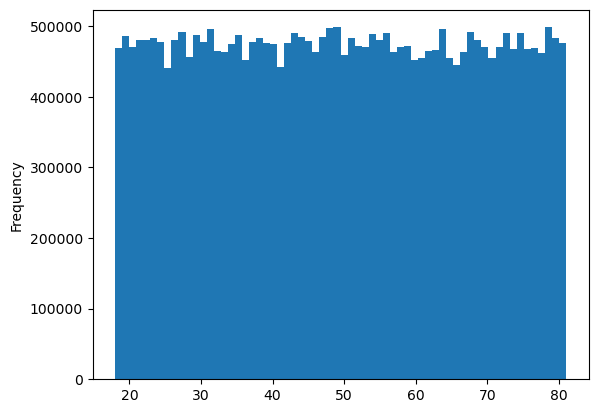

In [47]:
#Create a histogram of customer age
df_reg_cust['age'].plot.hist(bins = 64)

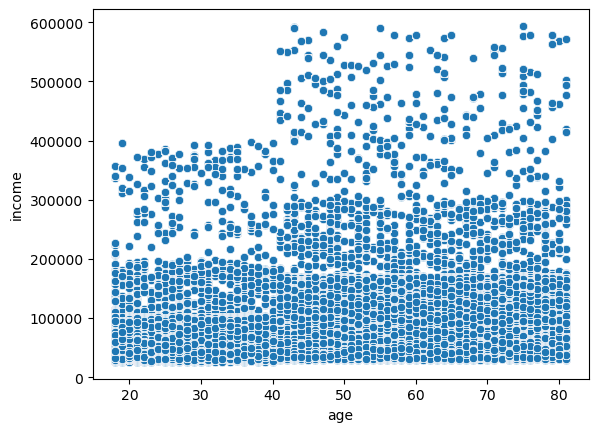

In [48]:
#recreating a scatterplot from Task 4.9 to show income range by age 
splot = sns.scatterplot(x = 'age', y = 'income',data = df_reg_cust)

# The Histogram illustrates uniform distribution of customers until 430000 and shows a slight variation above 450000. 

# Whereas, the scatterplot shows an increase in income range around age 40 and 65 will be used since it is a normal retirement age.


# Customers will be classified as follows -Young Adult: < 40 -Middle-Aged: 40-65 -Senior: >= 65

In [49]:
# Creating age_group classification - using loc to add new columns
df_reg_cust.loc[(df_reg_cust['age'] < 40), 'age_group'] = 'Young Adult'
df_reg_cust.loc[(df_reg_cust['age'] >= 40) & (df['age'] < 65), 'age_group'] = 'Middle-Aged'
df_reg_cust.loc[df_reg_cust['age'] >= 65, 'age_group'] = 'Senior'

C:\Users\User01\AppData\Local\Temp\ipykernel_8880\2283442893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust.loc[(df_reg_cust['age'] < 40), 'age_group'] = 'Young Adult'


In [50]:
#Checking entries of age_group column - by amount of products ordered
df_reg_cust['age_group'].value_counts(dropna = False).sort_index()

Middle-Aged    11863888
Senior          8032143
Young Adult    10454400
Name: age_group, dtype: int64

In [51]:
#Income profile
df_reg_cust['income'].describe()

count    3.035043e+07
mean     9.960619e+04
std      4.311527e+04
min      2.590300e+04
25%      6.722400e+04
50%      9.671900e+04
75%      1.280170e+05
max      5.939010e+05
Name: income, dtype: float64

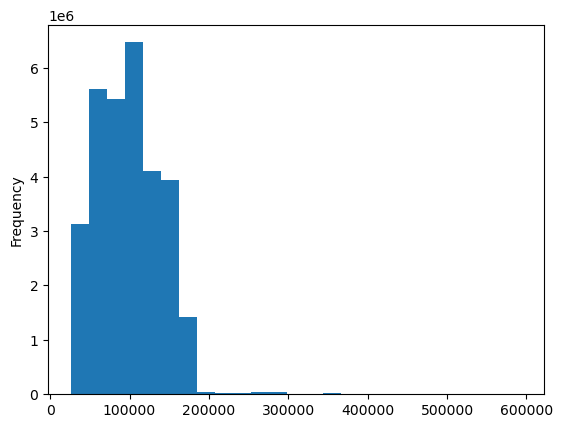

In [52]:
#Create a histogram of customer income
hist_cust_income = df_reg_cust['income'].plot.hist(bins = 25)

# Income range of customers ranges between 25k to 593k whereas Average income ranges 99k. 

# Customers Income can be flagged as 0-75k, 75-150k & 150K and above using loc function.

In [53]:
# Create income_group classification
df_reg_cust.loc[(df_reg_cust['income'] < 75000), 'income_group'] = '0-75k'
df_reg_cust.loc[(df_reg_cust['income'] >= 75000) & (df_reg_cust['income'] < 150000), 'income_group'] = '075-150k'
df_reg_cust.loc[(df_reg_cust['income'] >= 150000), 'income_group'] = '150k+'

C:\Users\User01\AppData\Local\Temp\ipykernel_8880\1002087655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust.loc[(df_reg_cust['income'] < 75000), 'income_group'] = '0-75k'


In [54]:
# Check the 'income_group' counts by number of items ordered
df_reg_cust['income_group'].value_counts(dropna = False)

075-150k    16808605
0-75k        9729901
150k+        3811925
Name: income_group, dtype: int64

In [55]:
df_reg_cust.shape

(30350431, 36)

In [56]:
# Family/dependants profile
df_reg_cust['number_of_dependants'].describe()

count    3.035043e+07
mean     1.501632e+00
std      1.118935e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: number_of_dependants, dtype: float64

<Axes: ylabel='Frequency'>

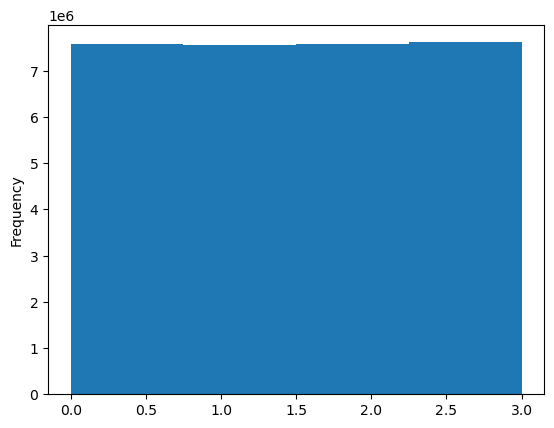

In [58]:
#Create a histogram of customer dependants
df_reg_cust['number_of_dependants'].plot.hist(bins = 4)

In [59]:
#Create a crosstab between number_dependants and family_status
family_crosstab = pd.crosstab(df_reg_cust['marital_status'], df_reg_cust['number_of_dependants'], dropna = False)

In [60]:
family_crosstab

number_of_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2593447,0,0,0
living with parents and siblings,0,498009,475301,478470
married,0,7067284,7103996,7138629
single,4995295,0,0,0


In [62]:
family_crosstab.to_clipboard()

# The family crosstab shows that No Single/Divorced/Widowed have dependants. Hence, Customers can be classified as No dependant=0 & >1 as Has Dependants.

In [64]:
# Create family_status classification
df_reg_cust.loc[(df_reg_cust['number_of_dependants'] == 0), 'dependants'] = 'No dependants'
df_reg_cust.loc[(df_reg_cust['number_of_dependants'] >= 1), 'dependants'] = 'Has dependants'

C:\Users\User01\AppData\Local\Temp\ipykernel_8880\1091383250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust.loc[(df_reg_cust['number_of_dependants'] == 0), 'dependants'] = 'No dependants'


In [65]:
# Check the 'dependants' counts by the number of items ordered
df_reg_cust['dependants'].value_counts(dropna = False)

Has dependants    22761689
No dependants      7588742
Name: dependants, dtype: int64

In [66]:
# Diet choice
diet_crosstab = pd.crosstab(df_reg_cust['department_id'], df_reg_cust['user_id'], dropna = False)

In [70]:
# Assigning diet flags to users and storing it in a dictionary
diet_dict = dict()
for user in diet_crosstab:
    workinglist = diet_crosstab[user].tolist()
    if workinglist[12] == 0 and workinglist[16] == 0:
        diet_dict[user] = 'Vegan'
    elif workinglist[12] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Non-Vegetarian'

In [71]:
# assigning user flags to the list
diet_list = []
for user in df_reg_cust['user_id']:
    diet_list.append(diet_dict[user])

In [72]:
#Adding 'diet_style' column to df_reg_cust
df_reg_cust['meal_preference'] = diet_list

C:\Users\User01\AppData\Local\Temp\ipykernel_8880\358397100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_cust['meal_preference'] = diet_list


In [73]:
df_reg_cust['meal_preference'].value_counts(dropna = False)

Non-Vegetarian    29319234
Vegan               597841
Vegetarian          433356
Name: meal_preference, dtype: int64

In [75]:
df_reg_cust.shape

(30350431, 38)

In [80]:
#Export df_reg_cust in .pkl format
df_reg_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_data_all_reg_customers.pkl'))

# All visualizations are included in 4.10 IC Coding Etiquette & Excel Reporting-Part-2